## Temperature Forecast Project using ML<br>
### Problem Statement:<br>
**Data Set Information:**<br>

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.<br>


**Attribute Information:**<br>

For more information, read [Cho et al, 2020].<br>
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [48]:
## Importing required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('max_columns',None)
warnings.filterwarnings('ignore')
from termcolor import colored

In [111]:
## Reading the dataset
data=pd.read_csv('temperature.csv')
## Saving a copy of the original dataset
data_copy=data

data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [112]:
data.shape

(7752, 25)

In [113]:
## Converting 'Date' in datetime format
data['Date'] = pd.to_datetime(data.Date)
data['Date'].head(2)

0   2013-06-30
1   2013-06-30
Name: Date, dtype: datetime64[ns]

In [114]:
## Extracting 'Day', 'Month' and 'year'
data['Day'] = data.Date.apply(lambda x: x.day)
data['Month'] = data.Date.apply(lambda x: x.month)
data['Year'] = data.Date.apply(lambda x: x.year)

In [115]:
## Dropping  'Date'
data.drop('Date',axis=1,inplace=True)

In [116]:
data.shape

(7752, 27)

In [117]:
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include='object').columns)

print(colored('No ofcolumns with object data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include='object').columns))

columns with object data: 
Index([], dtype='object')
No ofcolumns with object data: 
0


In [118]:
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['int64','float64']).columns)

print(colored('No ofcolumns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(len(data.select_dtypes(include=['int64','float64']).columns))

columns with numeric data: 
Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')
No ofcolumns with numeric data: 
27


- We have 27 features and 7752 observations.
- all 27 features have numeric data.
- 'Next_Tmax' &	'Next_Tmin' are our targets and both store numeric data.

In [119]:
## Checking for missing values
data.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

- Most of the features have missing values

In [120]:
## Dropping the null values
data.dropna(inplace=True)

In [121]:
data.shape

(7588, 27)

- Now we have 7588 obeservations left which means we lost around 2.1% data

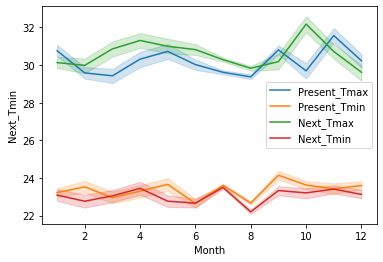

In [57]:
sns.lineplot(data=data,x='Month',y='Present_Tmax',label='Present_Tmax')
sns.lineplot(data=data,x='Month',y='Present_Tmin',label='Present_Tmin')
sns.lineplot(data=data,x='Month',y='Next_Tmax',label='Next_Tmax')
sns.lineplot(data=data,x='Month',y='Next_Tmin',label='Next_Tmin')

- March to June is th warmer period of the year.
- July to September is the cooler period.
- October show sudden spike in the temperature.

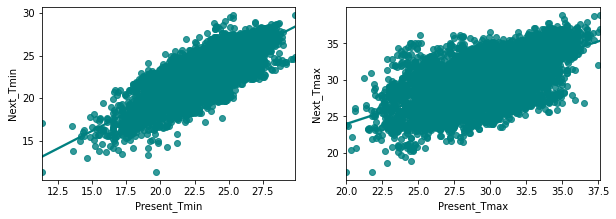

In [78]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['Present_Tmin'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['Present_Tmax'],color='teal')

- 'Present_Tmin' and 'Present_Tmax' show strong positive correlation with 'Next_Tmin' and 'Next_Tmax' respectively.

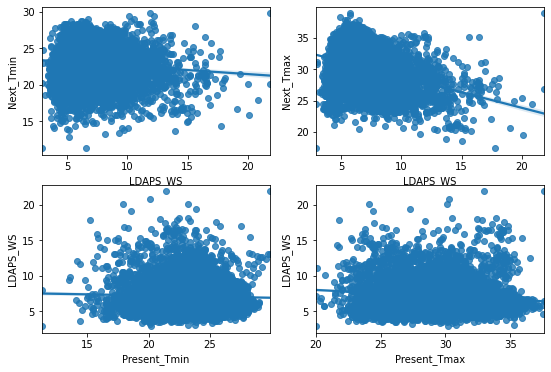

In [87]:
plt.figure(figsize=(9,6))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_WS'])
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_WS'])
plt.subplot(2,2,3)
sns.regplot(x=data['Present_Tmin'],y=data['LDAPS_WS'])
plt.subplot(2,2,4)
sns.regplot(x=data['Present_Tmax'],y=data['LDAPS_WS'])

- 'Next-day average wind speed' i.e. 'LDAPS_WS' does not show any correlation with 'Next_Tmin' but does show negative correlation with Next_Tmax
- 'Present_Tmin' and 'Present_Tmax' does not affect 'Next-day average wind speed' i.e. 'LDAPS_WS'

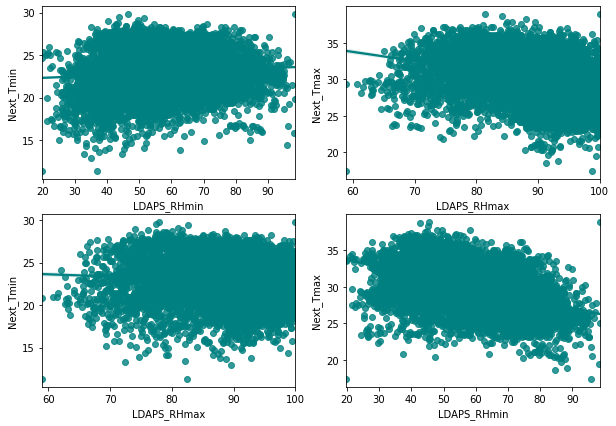

In [92]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_RHmin'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_RHmax'],color='teal')
plt.subplot(2,2,3)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_RHmax'],color='teal')
plt.subplot(2,2,4)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_RHmin'],color='teal')

- 'Next_Tmax' show negative correlationship with 'LDAPS_RHmax' and 'LDAPS_RHmin'
- 'Next_Tmin' mostly remain unaffected by 'LDAPS_RHmax' and 'LDAPS_RHmin'

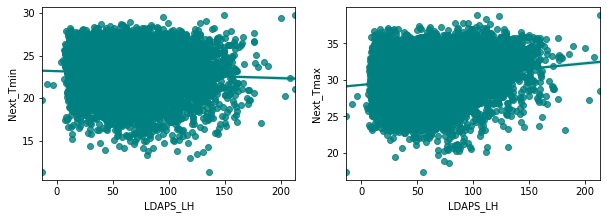

In [97]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_LH'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_LH'],color='teal')

- 'Next_Tmax' show positive correlation while 'Next_Tmin' show weak negative correlation with Next_Tmax

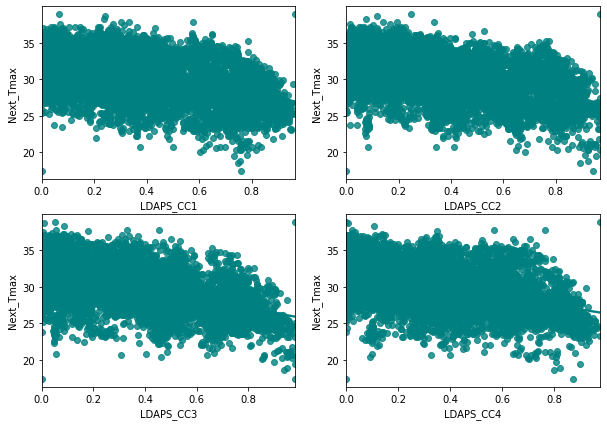

In [99]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_CC1'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_CC2'],color='teal')
plt.subplot(2,2,3)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_CC3'],color='teal')
plt.subplot(2,2,4)
sns.regplot(y=data['Next_Tmax'],x=data['LDAPS_CC4'],color='teal')

- Increase in cloud cover results in lower 'Next_Tmax'

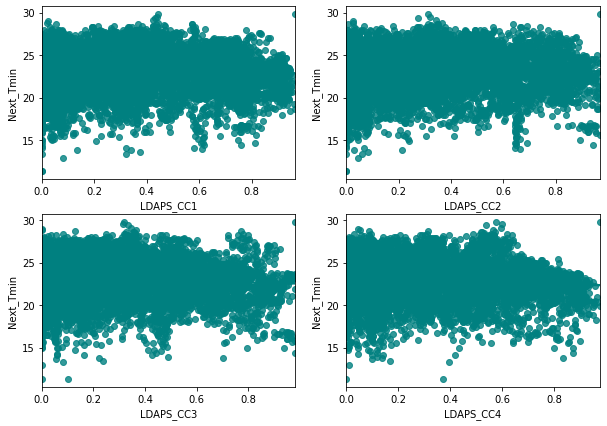

In [100]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_CC1'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_CC2'],color='teal')
plt.subplot(2,2,3)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_CC3'],color='teal')
plt.subplot(2,2,4)
sns.regplot(y=data['Next_Tmin'],x=data['LDAPS_CC4'],color='teal')

- 'Next_Tmin' mostly remain unaffected by the cloud cover.

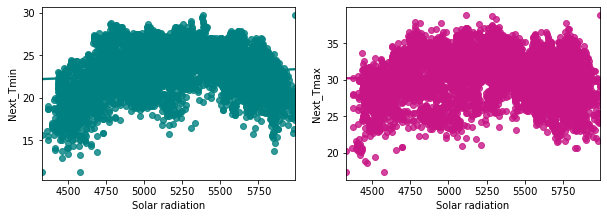

In [102]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.regplot(y=data['Next_Tmin'],x=data['Solar radiation'],color='teal')
plt.subplot(2,2,2)
sns.regplot(y=data['Next_Tmax'],x=data['Solar radiation'],color='mediumvioletred')

- Extreme values of Solar radiation on both the ends results in lower Next_Tmin and Next_Tmax

**Checking for skewness and outliers**

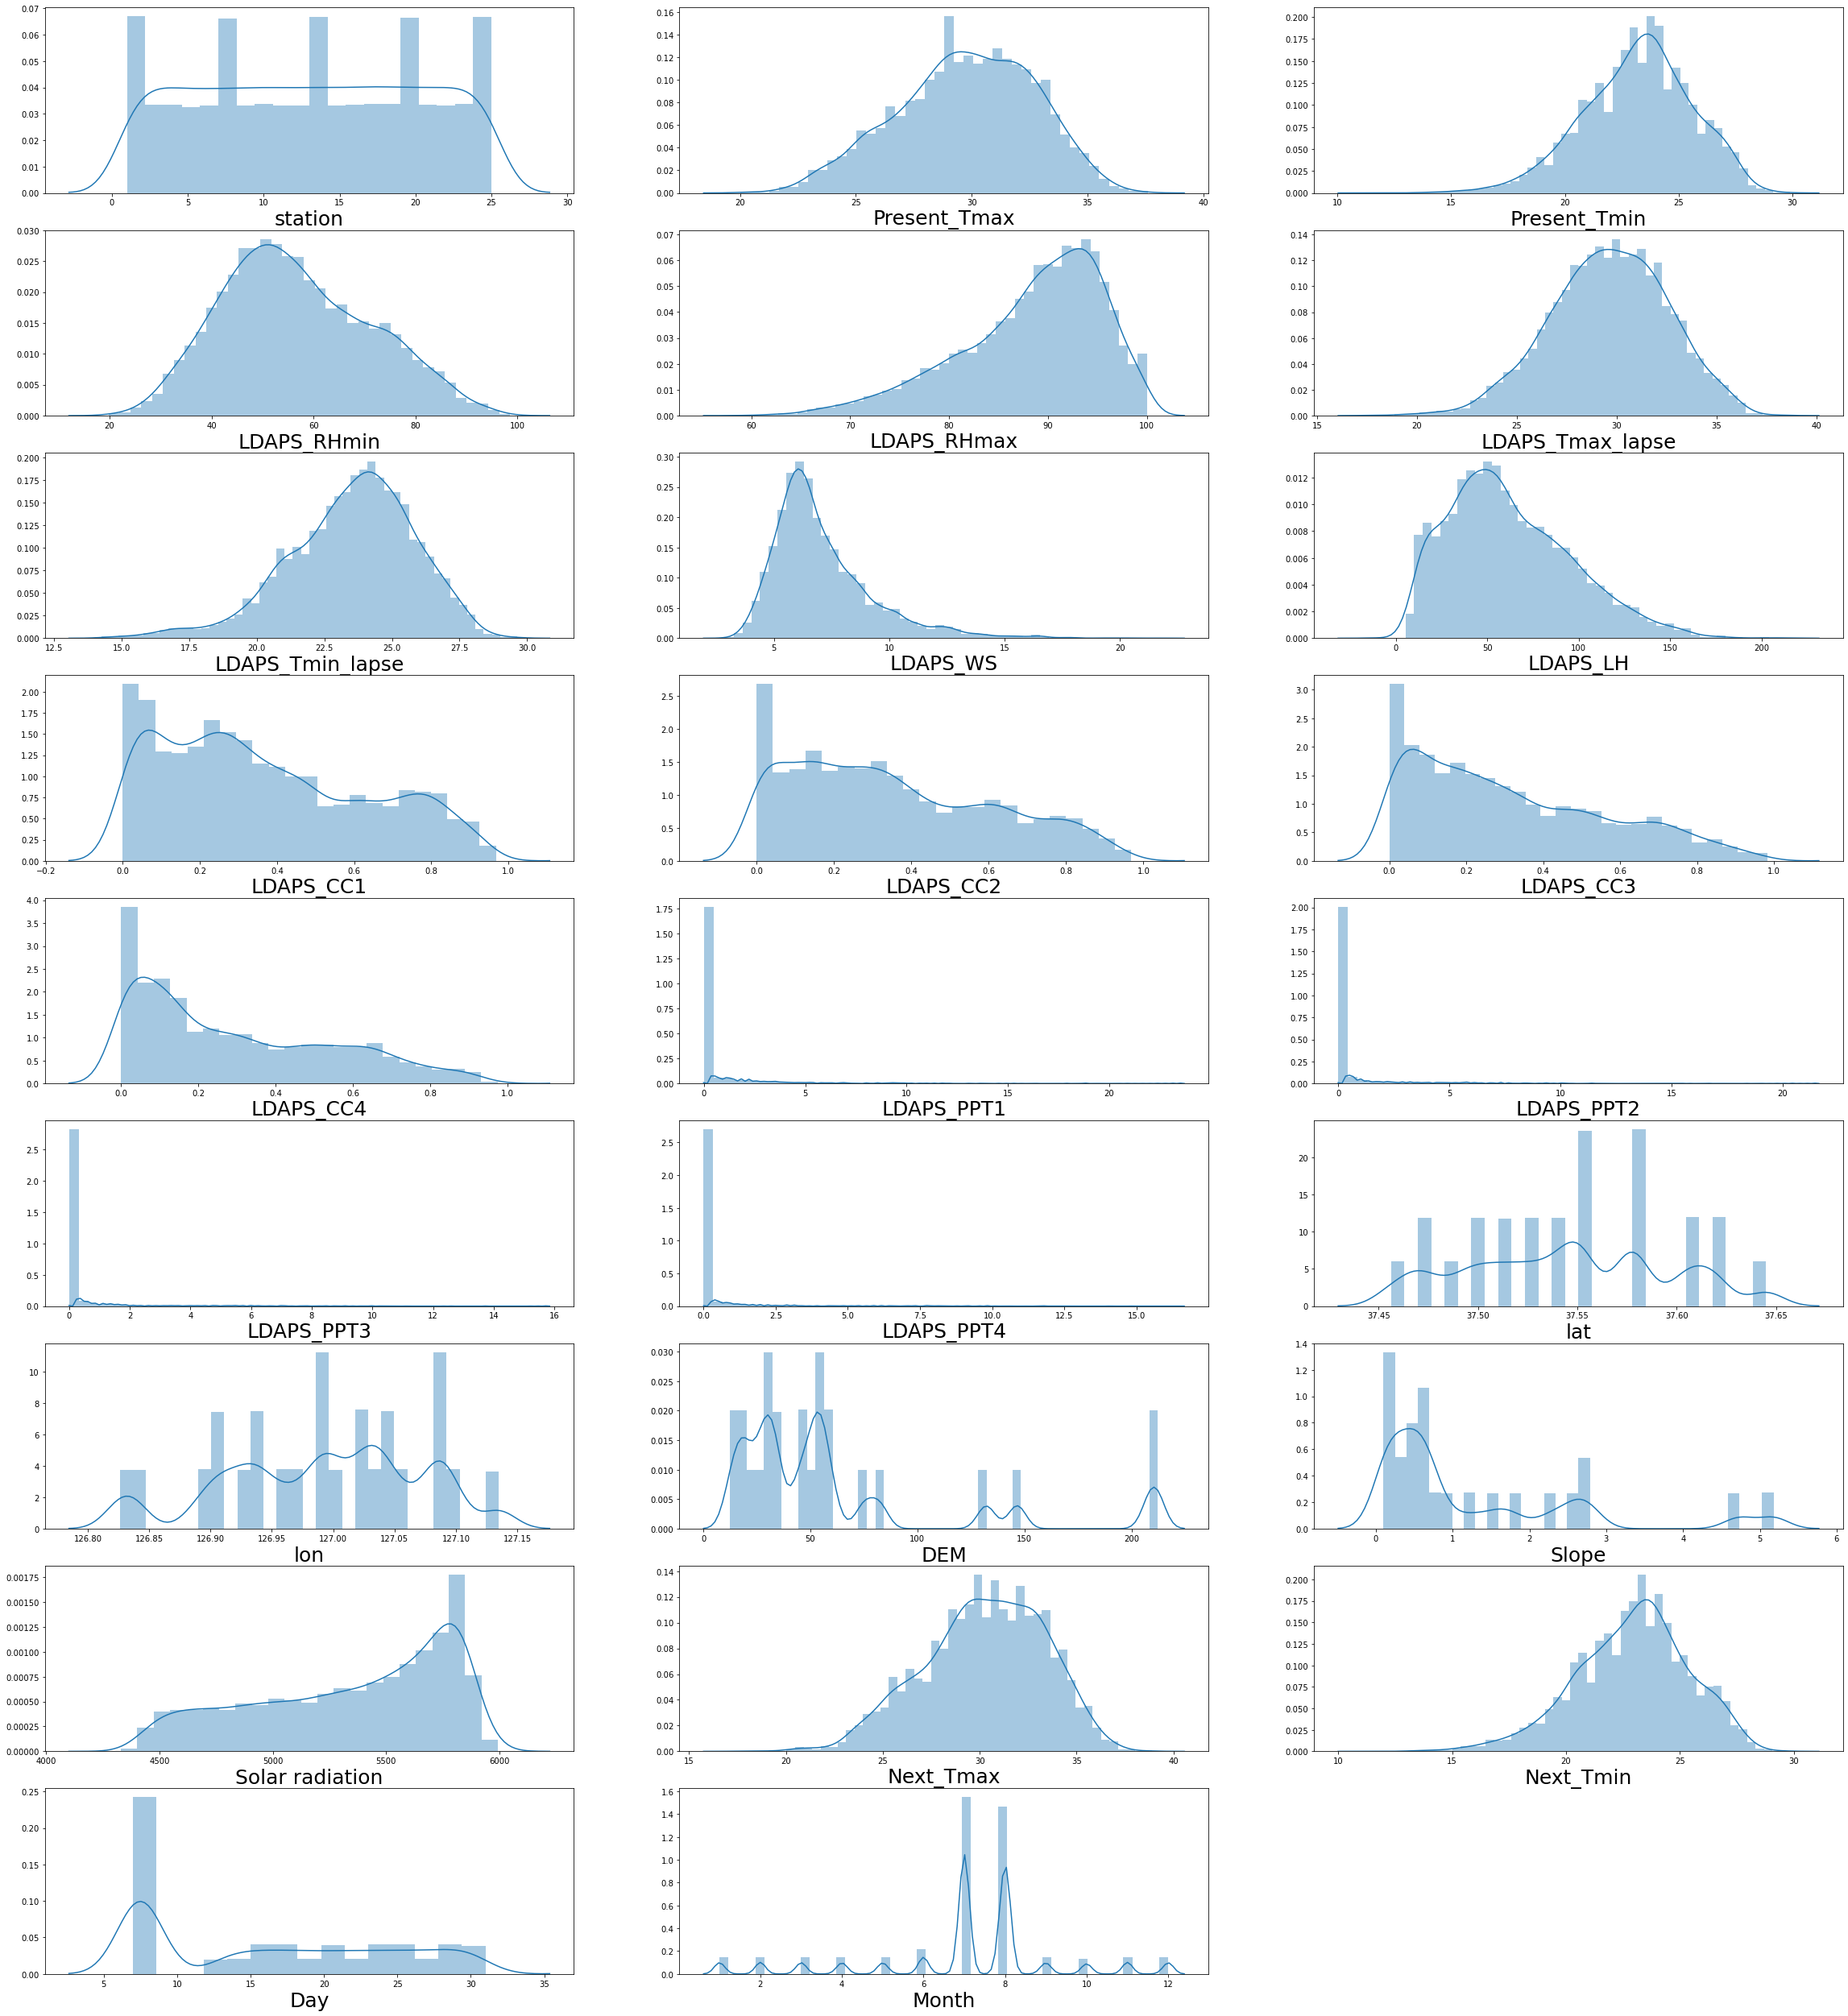

In [134]:
## Checking the distribution of the continuous features
plt.figure(figsize=(40,50))
plot_number=1

for i in data:
    if plot_number<27:
        ax=plt.subplot(10,3,plot_number)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

In [122]:
data.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

- Many features are showing skewness

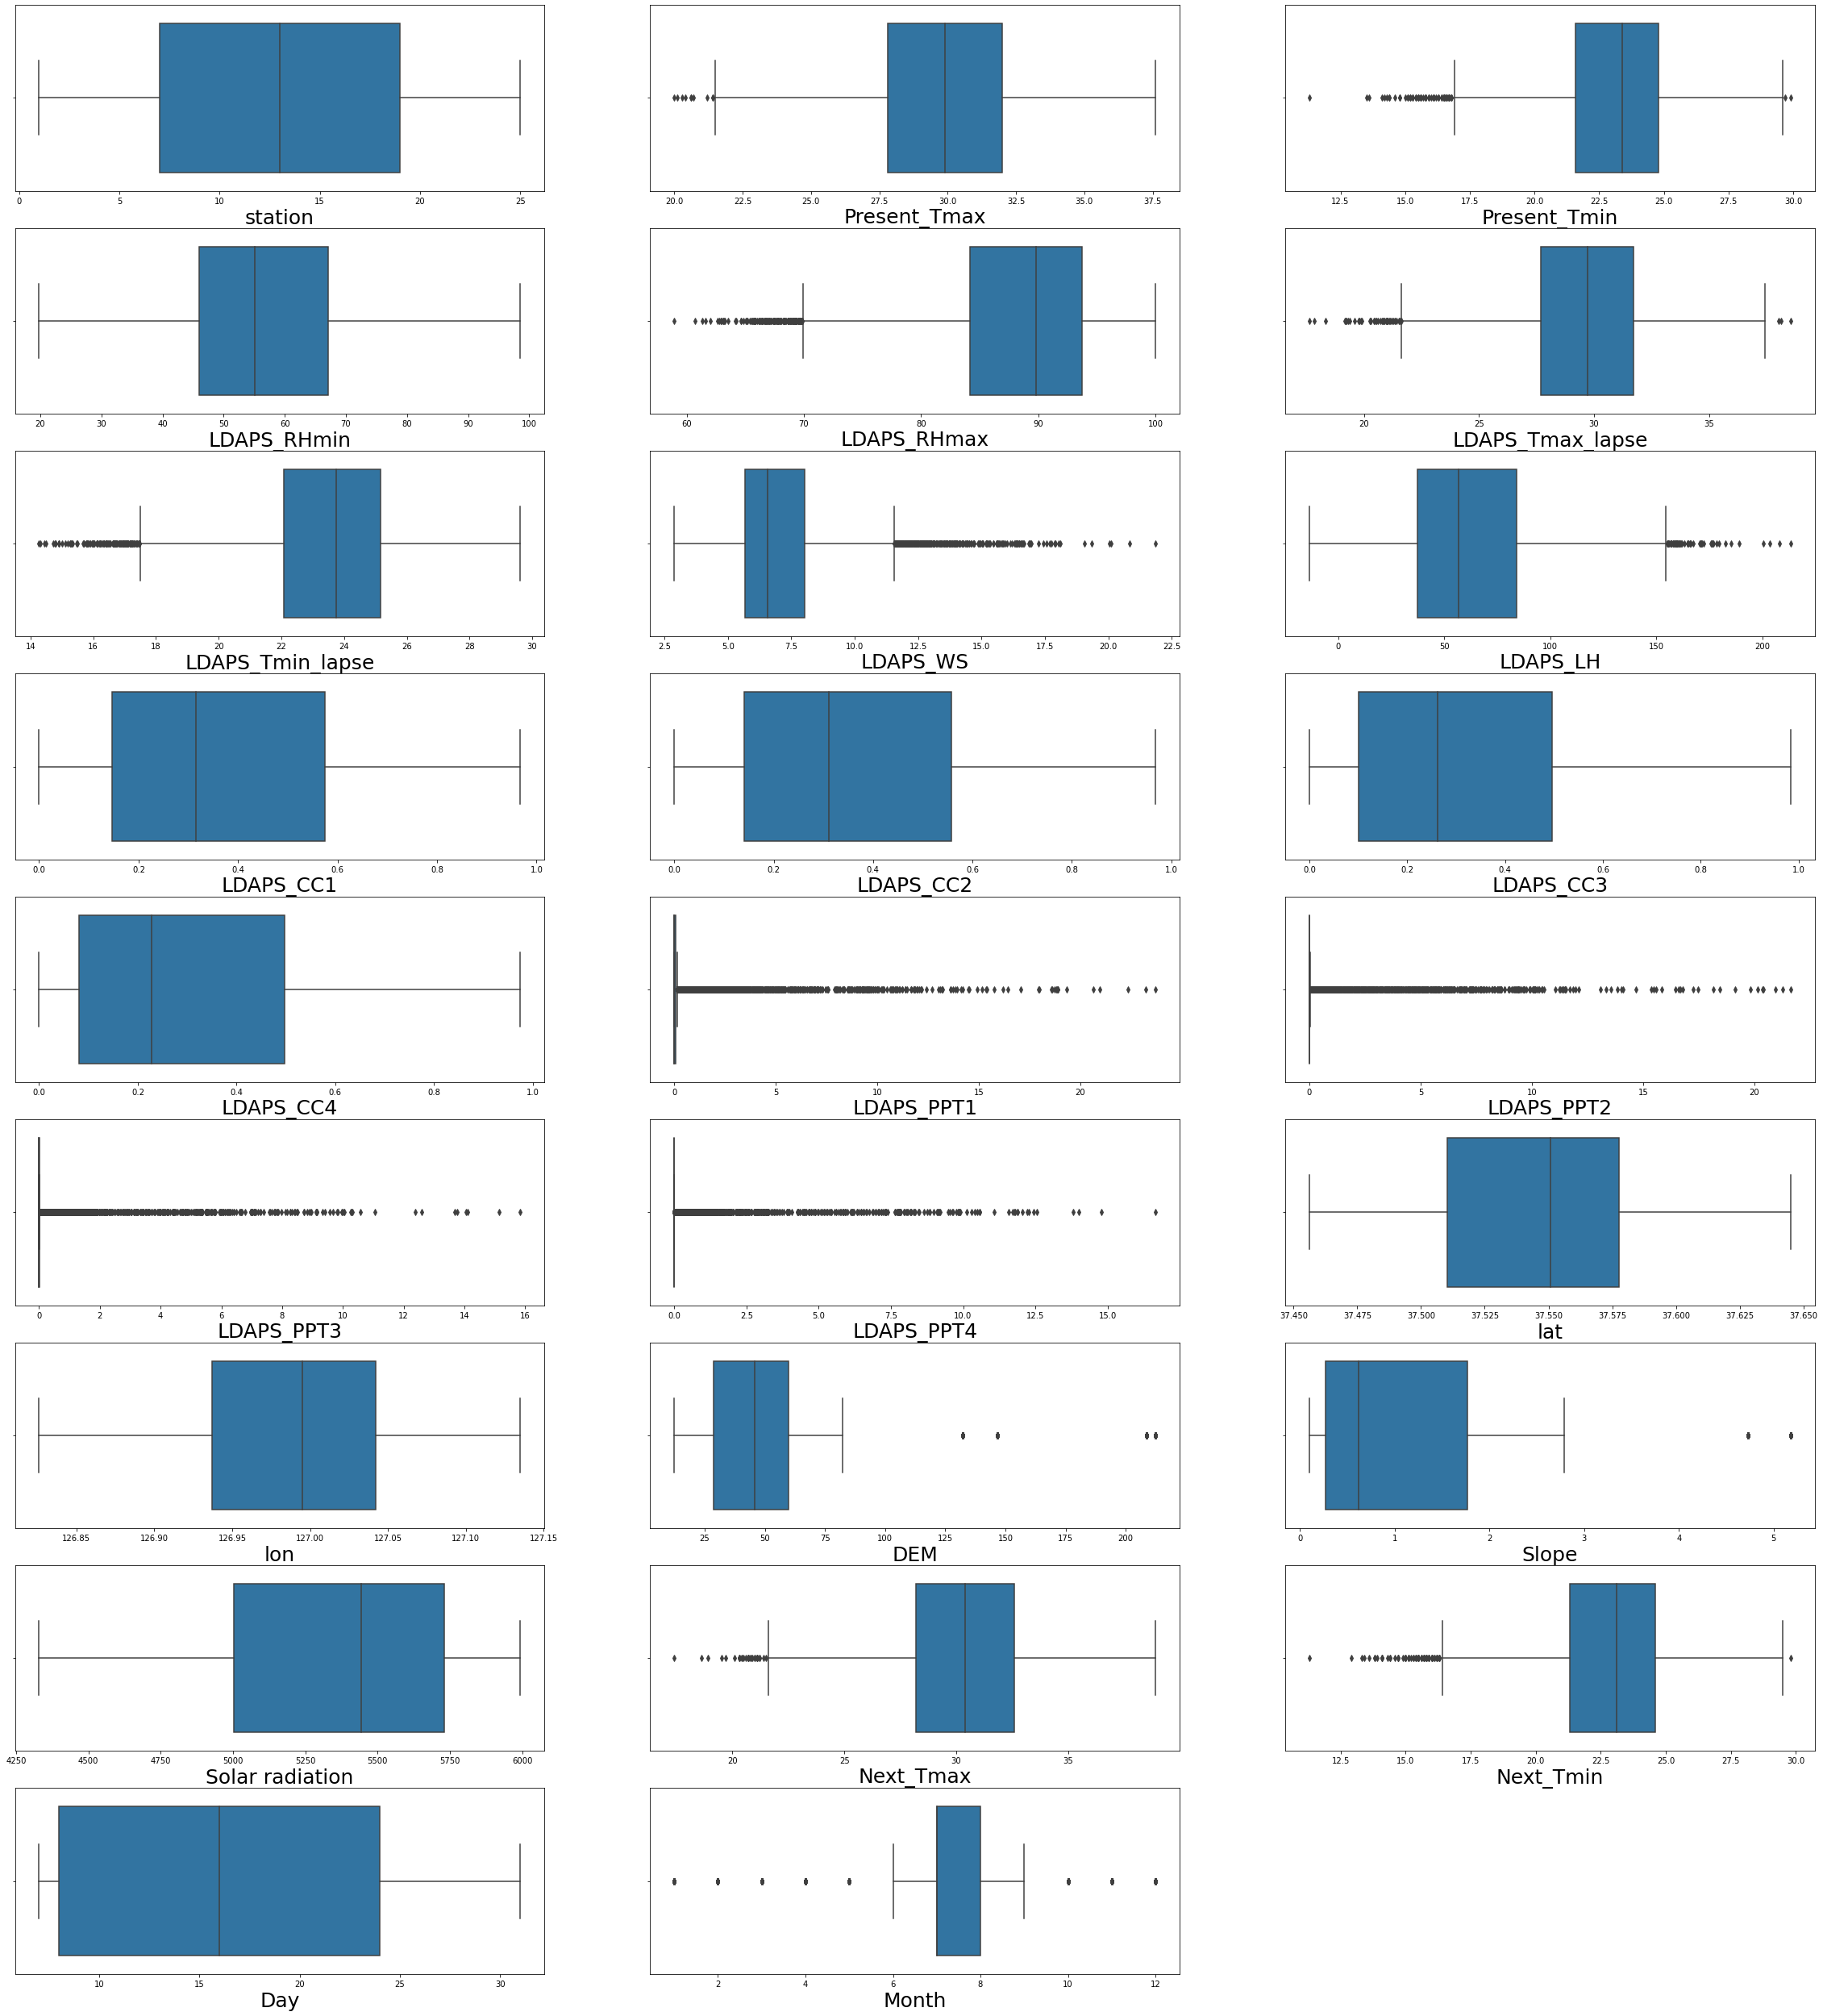

In [135]:
## Checking the distribution of the continuous features
plt.figure(figsize=(40,50))
plot_number=1

for i in data:
    if plot_number<27:
        ax=plt.subplot(10,3,plot_number)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=25)
    plot_number+=1

'Next_Tmax', 'Next_Tmin', 'station', 'Day', 'Solar radiation', 'lon', 'lat', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4'
have outliers

In [125]:
# rejecting data beyond 3 std to manage skewness and outliers
out=data.drop(['Next_Tmax','Next_Tmin','station','Day','Solar radiation',
               'lon','lat','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],axis=1)
from scipy.stats import zscore

z_score=zscore(out)
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)
data1=data[filtering_entry]

data1.shape

(6752, 27)

In [128]:
dataloss1=(7588-6752)/7588*100
dataloss1

11.017395888244597

- With Z threshold of 4, we are losing 11% data

In [126]:
# rejecting data beyond 3 std to manage skewness and outliers
out=data.drop(['Next_Tmax','Next_Tmin','station','Day','Solar radiation',
               'lon','lat','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4'],axis=1)
from scipy.stats import zscore

z_score=zscore(out)
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<4).all(axis=1)
data2=data[filtering_entry]

data2.shape

(7111, 27)

In [129]:
dataloss2=(7588-7111)/7588*100
dataloss2

6.28624143384291

- With Z threshold of 4, we are losing 6.3% data.
- Hence we will go ahead with z threshold of 4

In [130]:
data=data2
data.shape

(7111, 27)

In [233]:
## Applying power transformer to reduce skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [133]:
for i in data:
    if np.abs(data[i].skew())>=0.5:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))

In [134]:
data.skew()

station            -0.002615
Present_Tmax       -0.301160
Present_Tmin       -0.352513
LDAPS_RHmin         0.319126
LDAPS_RHmax        -0.113565
LDAPS_Tmax_lapse   -0.197996
LDAPS_Tmin_lapse   -0.025357
LDAPS_WS            0.007971
LDAPS_LH           -0.022940
LDAPS_CC1           0.060716
LDAPS_CC2           0.492905
LDAPS_CC3           0.095268
LDAPS_CC4           0.138153
LDAPS_PPT1          1.538215
LDAPS_PPT2          1.761415
LDAPS_PPT3          1.921464
LDAPS_PPT4          2.194115
lat                 0.090134
lon                -0.279877
DEM                 0.039817
Slope               0.234102
Solar radiation    -0.179293
Next_Tmax          -0.323143
Next_Tmin          -0.406919
Day                 0.240383
Month               0.044407
Year                0.003500
dtype: float64

- Skewness is reduced considerably.
- LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 are still skewed as they have lot of zero values compared to non-zero ones

<font color='red'>

## 'Next_Tmax' prediction

**Feature Selection using Pearson correlation and ANOVA F-values** 

In [136]:
data.corrwith(data['Next_Tmax']).nlargest(27)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.827283
Next_Tmin           0.605487
Present_Tmax        0.601716
LDAPS_Tmin_lapse    0.579633
Present_Tmin        0.460941
LDAPS_LH            0.133304
station             0.111615
Year                0.075442
lon                 0.007246
Solar radiation    -0.033741
Month              -0.033810
lat                -0.053399
Slope              -0.098880
Day                -0.124820
DEM                -0.136572
LDAPS_WS           -0.229663
LDAPS_PPT4         -0.242660
LDAPS_PPT3         -0.280586
LDAPS_RHmax        -0.302390
LDAPS_PPT1         -0.335976
LDAPS_PPT2         -0.352887
LDAPS_CC4          -0.405646
LDAPS_RHmin        -0.418639
LDAPS_CC1          -0.433405
LDAPS_CC3          -0.460760
LDAPS_CC2          -0.480489
dtype: float64

In [190]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [191]:
selectbest=SelectKBest(score_func=f_regression,k=27)
selectbest.fit(data,data['Next_Tmax'])

SelectKBest(k=27, score_func=<function f_regression at 0x000001581892D5E0>)

In [192]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.columns)

In [193]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(27,'Scores')

,Features,Scores
22,Next_Tmax,6.960020e+16
5,LDAPS_Tmax_lapse,1.541612e+04
23,Next_Tmin,4.114813e+03
1,Present_Tmax,4.034717e+03
6,LDAPS_Tmin_lapse,3.596912e+03
10,LDAPS_CC2,2.133912e+03
2,Present_Tmin,1.917914e+03
11,LDAPS_CC3,1.916002e+03
9,LDAPS_CC1,1.644203e+03
3,LDAPS_RHmin,1.510675e+03


-  Dropping 'lon', 'Solar radiation', 'Month', 'lat', 'Year', 'Slope','station' due to their poor score

In [137]:
data_max=data.drop(['lon', 'Solar radiation', 'Month', 'lat', 'Year','Slope','station'],axis=1)

**Seperating features and labels**

In [138]:
X1=data_max.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1=data_max['Next_Tmax']

**Scaling the features**

In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [140]:
X1_scaled=scaler.fit_transform(X1)

**Splitting the data in to training and testing sets**

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1_scaled,y1,test_size=0.25,random_state=42)

**Importing regression performance metrics**

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

## Model 1: KNeighbors Regressor

In [152]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

In [153]:
knr.fit(X1_train,y1_train)

KNeighborsRegressor()

In [154]:
y1_knr=knr.predict(X1_test)

In [155]:
knr_score1=r2_score(y1_test,y1_knr)
knr_score1

0.9066964822303103

In [156]:
knr_cvs1=cross_val_score(knr,X1_scaled,y1,cv=5).mean()
knr_cvs1

0.5237798681461863

In [157]:
knr_rmse1=np.sqrt(mean_squared_error(y1_test,y1_knr))
knr_rmse1

0.9441805655606623

In [158]:
knr_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_knr))
knr_rmae1

0.8400211578030671

## Model 2: Random Forest Regressor

In [264]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [265]:
rfr.fit(X1_train,y1_train)

RandomForestRegressor()

In [266]:
y1_rfr=rfr.predict(X1_test)

In [267]:
rfr_score1=r2_score(y1_test,y1_rfr)
rfr_score1

0.8882664423543871

In [268]:
rfr_cvs1=cross_val_score(rfr,X1_scaled,y1,cv=5).mean()
rfr_cvs1

0.6759844448773095

In [269]:
rfr_rmse1=np.sqrt(mean_squared_error(y1_test,y1_rfr))
rfr_rmse1

1.0332320317254862

In [270]:
rfr_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_rfr))
rfr_rmae1

0.8705340796327415

## Model 3: Gradient Boosting Regressor

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [167]:
gbr.fit(X1_train,y1_train)

GradientBoostingRegressor()

In [168]:
y1_gbr=gbr.predict(X1_test)

In [169]:
gbr_score1=r2_score(y1_test,y1_gbr)
gbr_score1

0.8381017976717567

In [170]:
gbr_cvs1=cross_val_score(gbr,X1_scaled,y1,cv=5).mean()
gbr_cvs1

0.7052351438490747

In [171]:
gbr_rmse1=np.sqrt(mean_squared_error(y1_test,y1_gbr))
gbr_rmse1

1.2437327237782763

In [172]:
gbr_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_gbr))
gbr_rmae1

0.974049145726376

## Model 4: ADA Boost Regressor

In [173]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [174]:
abr.fit(X1_train,y1_train)

AdaBoostRegressor()

In [175]:
y1_abr=abr.predict(X1_test)

In [176]:
abr_score1=r2_score(y1_test,y1_abr)
abr_score1

0.7607915716228528

In [177]:
abr_cvs1=cross_val_score(abr,X1_scaled,y1,cv=5).mean()
abr_cvs1

0.6612292360203369

In [178]:
abr_rmse1=np.sqrt(mean_squared_error(y1_test,y1_abr))
abr_rmse1

1.5117998112479623

In [179]:
abr_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_abr))
abr_rmae1

1.096963023114915

## Model 5: SVR

In [180]:
from sklearn.svm import SVR
svr=SVR()

In [181]:
svr.fit(X1_train,y1_train)

SVR()

In [182]:
y1_svr=svr.predict(X1_test)

In [183]:
svr_score1=r2_score(y1_test,y1_svr)
svr_score1

0.8656652064762727

In [184]:
svr_cvs1=cross_val_score(svr,X1_scaled,y1,cv=5).mean()
svr_cvs1

0.6367461508857412

In [185]:
svr_rmse1=np.sqrt(mean_squared_error(y1_test,y1_svr))
svr_rmse1

1.1329227659841055

In [186]:
svr_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_svr))
svr_rmae1

0.9101578862750892

**Saving performance metrics of all models in single dataframe**

In [240]:
metrics=pd.DataFrame()
metrics['Model']=['KNN Regressor','SVR','RandomForest Regressor','GradientBoosting Regressor','ADA Boost Regressor']
metrics['R2 Score']=[knr_score1,svr_score1,rfr_score1,gbr_score1,abr_score1]
metrics['Cross Val Score']=[knr_cvs1,svr_cvs1,rfr_cvs1,gbr_cvs1,abr_cvs1]
metrics['RMSE']=[knr_rmse1,svr_rmse1,rfr_rmse1,gbr_rmse1,abr_rmse1]
metrics['RMAE']=[knr_rmae1,svr_rmae1,rfr_rmae1,gbr_rmae1,abr_rmae1]

metrics.nlargest(5,'R2 Score')

,Model,R2 Score,Cross Val Score,RMSE,RMAE
0,KNN Regressor,0.906696,0.523780,0.944181,0.840021
2,RandomForest Regressor,0.889600,0.675610,1.027046,0.867278
1,SVR,0.865665,0.636746,1.132923,0.910158
3,GradientBoosting Regressor,0.838102,0.705235,1.243733,0.974049
4,ADA Boost Regressor,0.760792,0.661229,1.511800,1.096963


- KNN Regressor has best R2 Score but gives very poor Cross Val Score.
- Will choose 'RandomForest Regressor' as best model for this data.

**Hyperparameter Tuning**

In [242]:
from sklearn.model_selection import GridSearchCV

In [251]:
rfr_grid={'n_estimators': [100,120],
          'min_samples_split': [2,3,4],
          'min_samples_leaf': [1,2,3],
          'max_leaf_nodes': [1,None]}

In [252]:
gridCV=GridSearchCV(rfr,param_grid=rfr_grid,n_jobs=-1)

In [253]:
gridCV.fit(X1_train,y1_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [1, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 120]})

In [254]:
gridCV.best_params_

{'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [281]:
rfr_best=RandomForestRegressor(n_estimators=120,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None)

In [282]:
rfr_best.fit(X1_train,y1_train)

RandomForestRegressor(n_estimators=120)

In [283]:
y1_best=rfr_best.predict(X1_test)

In [284]:
best_score1=r2_score(y1_test,y1_best)
best_score1

0.8901051305097664

In [285]:
best_rmse1=np.sqrt(mean_squared_error(y1_test,y1_best))
best_rmse1

1.0246953294977912

In [286]:
best_rmae1=np.sqrt(mean_absolute_error(y1_test,y1_best))
best_rmae1

0.8678659572969893

Text(0.5, 1.0, 'Actual vs Predicted Next_Tmax')

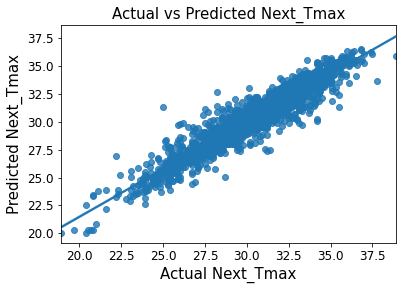

In [380]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



sns.regplot(y1_test,y1_best)
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('Actual vs Predicted Next_Tmax')

### Saving the best model

In [379]:
import pickle
filename='Next_Tmax_RFR.pkl'
pickle.dump(rfr_best,open(filename,'wb'))

<font color='red'>

## 'Next_Tmin' Prediction

**Features selection for 'Next_Tmin' prediction using pearson's correlation and ANOVA F-values**

In [188]:
data.corrwith(data['Next_Tmin']).nlargest(27)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.879489
Present_Tmin        0.797204
Present_Tmax        0.622410
Next_Tmax           0.605487
LDAPS_Tmax_lapse    0.578015
LDAPS_RHmin         0.136679
station             0.130537
LDAPS_CC2           0.065037
Solar radiation     0.051581
LDAPS_CC1           0.033738
Year                0.032538
LDAPS_CC3           0.013086
LDAPS_PPT2         -0.003655
LDAPS_WS           -0.003733
LDAPS_CC4          -0.023777
Month              -0.036248
LDAPS_PPT3         -0.037673
LDAPS_PPT1         -0.042359
lon                -0.045211
LDAPS_LH           -0.068017
LDAPS_RHmax        -0.079420
lat                -0.083111
LDAPS_PPT4         -0.112972
Day                -0.130369
Slope              -0.168281
DEM                -0.249669
dtype: float64

In [194]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [195]:
selectbest=SelectKBest(score_func=f_regression,k=27)
selectbest.fit(data,data['Next_Tmin'])

SelectKBest(k=27, score_func=<function f_regression at 0x000001581892D5E0>)

In [196]:
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(data.columns)

In [197]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores.nlargest(27,'Scores')

,Features,Scores
6,LDAPS_Tmin_lapse,2.427755e+04
2,Present_Tmin,1.239622e+04
1,Present_Tmax,4.495531e+03
22,Next_Tmax,4.114813e+03
5,LDAPS_Tmax_lapse,3.566805e+03
19,DEM,4.725974e+02
20,Slope,2.071828e+02
3,LDAPS_RHmin,1.353317e+02
0,station,1.232371e+02
24,Day,1.229146e+02


-  Dropping 'LDAPS_PPT2','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','Year','Month','LDAPS_CC1','LDAPS_PPT3','LDAPS_PPT1','lon' due to their poor score

In [328]:
data_min=data.drop(['LDAPS_PPT2','LDAPS_WS','LDAPS_CC3','LDAPS_CC4','Year','Month','LDAPS_CC1','LDAPS_PPT3','LDAPS_PPT1','lon'],axis=1)

In [329]:
X2_scaled=scaler.fit_transform(data_min.drop(['Next_Tmax','Next_Tmin'],axis=1))

In [330]:
y2=data_min['Next_Tmin']

In [331]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2_scaled,y2,test_size=0.25,random_state=42)

## Model 1: KNeighbors Regressor

In [332]:
knr.fit(X2_train,y2_train)

KNeighborsRegressor()

In [333]:
y2_knr=knr.predict(X2_test)

In [334]:
knr_score2=r2_score(y2_test,y2_knr)
knr_score2

0.8367965499045035

In [335]:
knr_cvs2=cross_val_score(knr,X2_scaled,y2,cv=5).mean()
knr_cvs2

0.6679774828360934

In [336]:
knr_rmse2=np.sqrt(mean_squared_error(y2_test,y2_knr))
knr_rmse2

1.0231464076213976

In [337]:
knr_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_knr))
knr_rmae2

0.8788158000108478

## Model 2: Random Forest Regressor

In [338]:
rfr.fit(X2_train,y2_train)

RandomForestRegressor()

In [339]:
y2_rfr=rfr.predict(X2_test)

In [340]:
rfr_score2=r2_score(y2_test,y2_rfr)
rfr_score2

0.8860142208470125

In [341]:
rfr_cvs2=cross_val_score(rfr,X2_scaled,y2,cv=5).mean()
rfr_cvs2

0.7867923185804825

In [342]:
rfr_rmse2=np.sqrt(mean_squared_error(y2_test,y2_rfr))
rfr_rmse2

0.8550636653290971

In [343]:
rfr_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_rfr))
rfr_rmae2

0.8115483957535553

## Model 3: Gradient Boosting Regressor

In [344]:
gbr.fit(X2_train,y2_train)

GradientBoostingRegressor()

In [345]:
y2_gbr=gbr.predict(X2_test)

In [346]:
gbr_score2=r2_score(y2_test,y2_gbr)
gbr_score2

0.8681774488897648

In [347]:
gbr_cvs2=cross_val_score(gbr,X2_scaled,y2,cv=5).mean()
gbr_cvs2

0.8063950718593954

In [348]:
gbr_rmse2=np.sqrt(mean_squared_error(y2_test,y2_gbr))
gbr_rmse2

0.9195343812378621

In [349]:
gbr_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_gbr))
gbr_rmae2

0.8454569175549123

## Model 4: Ada Boost Regressor

In [350]:
abr.fit(X2_train,y2_train)

AdaBoostRegressor()

In [351]:
y2_abr=abr.predict(X2_test)

In [352]:
abr_score2=r2_score(y2_test,y2_abr)
abr_score2

0.8035270270777777

In [353]:
abr_cvs2=cross_val_score(abr,X2_scaled,y2,cv=5).mean()
abr_cvs2

0.7476934405142301

In [354]:
abr_rmse2=np.sqrt(mean_squared_error(y2_test,y2_abr))
abr_rmse2

1.1225986726312953

In [355]:
abr_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_abr))
abr_rmae2

0.9528679507226727

## Model 5: SVR

In [356]:
svr.fit(X2_train,y2_train)

SVR()

In [357]:
y2_svr=svr.predict(X2_test)

In [358]:
svr_score2=r2_score(y2_test,y2_svr)
svr_score2

0.8664008380051095

In [359]:
svr_cvs2=cross_val_score(svr,X2_scaled,y2,cv=5).mean()
svr_cvs2

0.7644388022518221

In [360]:
svr_rmse2=np.sqrt(mean_squared_error(y2_test,y2_svr))
svr_rmse2

0.9257100592558805

In [361]:
svr_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_svr))
svr_rmae2

0.831872797300359

**Saving performance metrics of all models in single dataframe**

In [363]:
metrics=pd.DataFrame()
metrics['Model']=['KNN Regressor','SVR','RandomForest Regressor','GradientBoosting Regressor','ADA Boost Regressor']
metrics['R2 Score']=[knr_score2,svr_score2,rfr_score2,gbr_score2,abr_score2]
metrics['Cross Val Score']=[knr_cvs2,svr_cvs2,rfr_cvs2,gbr_cvs2,abr_cvs2]
metrics['RMSE']=[knr_rmse2,svr_rmse2,rfr_rmse2,gbr_rmse2,abr_rmse2]
metrics['RMAE']=[knr_rmae2,svr_rmae2,rfr_rmae2,gbr_rmae2,abr_rmae2]

metrics.nlargest(5,'R2 Score')

,Model,R2 Score,Cross Val Score,RMSE,RMAE
2,RandomForest Regressor,0.886014,0.786792,0.855064,0.811548
3,GradientBoosting Regressor,0.868177,0.806395,0.919534,0.845457
1,SVR,0.866401,0.764439,0.925710,0.831873
0,KNN Regressor,0.836797,0.667977,1.023146,0.878816
4,ADA Boost Regressor,0.803527,0.747693,1.122599,0.952868


- Based on R2 Score, RMSE and RMAE, Random Forest Regressor is our best model for this dataset

**Hyperparameter Tuning**

In [364]:
gridCV.fit(X2_train,y2_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [1, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 120]})

In [365]:
gridCV.best_params_

{'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [368]:
rfr_best2=RandomForestRegressor(n_estimators=120,min_samples_split=2,min_samples_leaf=1,max_leaf_nodes=None)

In [369]:
rfr_best2.fit(X2_train,y2_train)

RandomForestRegressor(n_estimators=120)

In [370]:
y2_best=rfr_best2.predict(X2_test)

In [371]:
best_score2=r2_score(y2_test,y2_best)
best_score2

0.8860169357464346

In [373]:
best_rmse2=np.sqrt(mean_squared_error(y2_test,y2_best))
best_rmse2

0.8550534823672796

In [374]:
best_rmae2=np.sqrt(mean_absolute_error(y2_test,y2_best))
best_rmae2

0.809051658225104

Text(0.5, 1.0, 'Actual vs Predicted Next_Tmin')

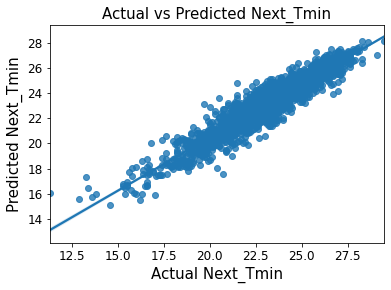

In [377]:
parameters = {'ytick.labelsize': 12,
          'xtick.labelsize': 12,'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)



sns.regplot(y2_test,y2_best)
plt.xlabel('Actual Next_Tmin')
plt.ylabel('Predicted Next_Tmin')
plt.title('Actual vs Predicted Next_Tmin')

### Saving the best model

In [378]:
import pickle
filename='Next_Tmin_RFR.pkl'
pickle.dump(rfr_best2,open(filename,'wb'))